<a href="https://colab.research.google.com/github/Jinnie506/Hamoye-Data-Science/blob/main/StageBquiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [43]:
#read csv file
url = r'http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'

energy_df= pd.read_csv(url)
energy_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


### Describe Dataset

In [44]:
# get column names
col_names = {'T1':'Kitchen_Temp_Celsuis',
             'RH_1':'Kitchen_Humidity(%)',
            'T2':'Living_Room_Temp_Celsuis',
            'RH_2':'Living_Room_Humidity(%)',
            'T3':'Laundary_Room_Celsius_Temp',
            'RH_3':'Laundary_Room_Humidity(%)',
             'T4':'Office_Room_Celsius_Temp',
             'RH_4':'Office_Room_Humidity(%)',
             'T5':'Bathroom_Celsuis_Temp',
             'RH_5':'Bathroom_Humidity(%)',
             'T6':'Outside_Building_northside_Celsius_Temp',
             'RH_6':'Outside_Building_northside_Humidity(%)',
             'T7':'Ironing_Room_Celsuis_Temp',
             'RH_7':'Ironing_Room_Humidity(%)',
             'T8':'Teenager_Room2_Celsuis_Temp',
             'RH_8':'Teenager_Room2_Humidity(%)',
             'T9':'Parent_Room_Celsuis_Temp',
             'RH_9':'Parent_Room_Humidity(%)',
             'rv1':'Random_Variable1',
             'rv2':'Random_Variable2'
            }
# rename columns
energy_df.rename(columns=col_names, inplace=True)
energy_df.head()

,date,Appliances,lights,Kitchen_Temp_Celsuis,Kitchen_Humidity(%),Living_Room_Temp_Celsuis,Living_Room_Humidity(%),Laundary_Room_Celsius_Temp,Laundary_Room_Humidity(%),Office_Room_Celsius_Temp,Office_Room_Humidity(%),Bathroom_Celsuis_Temp,Bathroom_Humidity(%),Outside_Building_northside_Celsius_Temp,Outside_Building_northside_Humidity(%),Ironing_Room_Celsuis_Temp,Ironing_Room_Humidity(%),Teenager_Room2_Celsuis_Temp,Teenager_Room2_Humidity(%),Parent_Room_Celsuis_Temp,Parent_Room_Humidity(%),T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Random_Variable1,Random_Variable2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [45]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date                                     19735 non-null  object 
 1   Appliances                               19735 non-null  int64  
 2   lights                                   19735 non-null  int64  
 3   Kitchen_Temp_Celsuis                     19735 non-null  float64
 4   Kitchen_Humidity(%)                      19735 non-null  float64
 5   Living_Room_Temp_Celsuis                 19735 non-null  float64
 6   Living_Room_Humidity(%)                  19735 non-null  float64
 7   Laundary_Room_Celsius_Temp               19735 non-null  float64
 8   Laundary_Room_Humidity(%)                19735 non-null  float64
 9   Office_Room_Celsius_Temp                 19735 non-null  float64
 10  Office_Room_Humidity(%)                  19735

In [46]:
energy_df.describe()

,Appliances,lights,Kitchen_Temp_Celsuis,Kitchen_Humidity(%),Living_Room_Temp_Celsuis,Living_Room_Humidity(%),Laundary_Room_Celsius_Temp,Laundary_Room_Humidity(%),Office_Room_Celsius_Temp,Office_Room_Humidity(%),Bathroom_Celsuis_Temp,Bathroom_Humidity(%),Outside_Building_northside_Celsius_Temp,Outside_Building_northside_Humidity(%),Ironing_Room_Celsuis_Temp,Ironing_Room_Humidity(%),Teenager_Room2_Celsuis_Temp,Teenager_Room2_Humidity(%),Parent_Room_Celsuis_Temp,Parent_Room_Humidity(%),T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Random_Variable1,Random_Variable2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [47]:
energy_df.isnull().sum()

date                                       0
Appliances                                 0
lights                                     0
Kitchen_Temp_Celsuis                       0
Kitchen_Humidity(%)                        0
Living_Room_Temp_Celsuis                   0
Living_Room_Humidity(%)                    0
Laundary_Room_Celsius_Temp                 0
Laundary_Room_Humidity(%)                  0
Office_Room_Celsius_Temp                   0
Office_Room_Humidity(%)                    0
Bathroom_Celsuis_Temp                      0
Bathroom_Humidity(%)                       0
Outside_Building_northside_Celsius_Temp    0
Outside_Building_northside_Humidity(%)     0
Ironing_Room_Celsuis_Temp                  0
Ironing_Room_Humidity(%)                   0
Teenager_Room2_Celsuis_Temp                0
Teenager_Room2_Humidity(%)                 0
Parent_Room_Celsuis_Temp                   0
Parent_Room_Humidity(%)                    0
T_out                                      0
Press_mm_h

In [48]:
## Drop Irrelevant columns
energy_df.drop(columns=['date', 'lights'], inplace=True)

In [49]:
energy_df.head()

,Appliances,Kitchen_Temp_Celsuis,Kitchen_Humidity(%),Living_Room_Temp_Celsuis,Living_Room_Humidity(%),Laundary_Room_Celsius_Temp,Laundary_Room_Humidity(%),Office_Room_Celsius_Temp,Office_Room_Humidity(%),Bathroom_Celsuis_Temp,Bathroom_Humidity(%),Outside_Building_northside_Celsius_Temp,Outside_Building_northside_Humidity(%),Ironing_Room_Celsuis_Temp,Ironing_Room_Humidity(%),Teenager_Room2_Celsuis_Temp,Teenager_Room2_Humidity(%),Parent_Room_Celsuis_Temp,Parent_Room_Humidity(%),T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Random_Variable1,Random_Variable2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [50]:
## check correlation
energy_df.corr()

,Appliances,Kitchen_Temp_Celsuis,Kitchen_Humidity(%),Living_Room_Temp_Celsuis,Living_Room_Humidity(%),Laundary_Room_Celsius_Temp,Laundary_Room_Humidity(%),Office_Room_Celsius_Temp,Office_Room_Humidity(%),Bathroom_Celsuis_Temp,Bathroom_Humidity(%),Outside_Building_northside_Celsius_Temp,Outside_Building_northside_Humidity(%),Ironing_Room_Celsuis_Temp,Ironing_Room_Humidity(%),Teenager_Room2_Celsuis_Temp,Teenager_Room2_Humidity(%),Parent_Room_Celsuis_Temp,Parent_Room_Humidity(%),T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Random_Variable1,Random_Variable2
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
Kitchen_Temp_Celsuis,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
Kitchen_Humidity(%),0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
Living_Room_Temp_Celsuis,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
Living_Room_Humidity(%),-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
Laundary_Room_Celsius_Temp,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
Laundary_Room_Humidity(%),0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
Office_Room_Celsius_Temp,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
Office_Room_Humidity(%),0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
Bathroom_Celsuis_Temp,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,0.032786,0.629161,-0.632384,0.870624,0.148905,0.824981,0.016388,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490


### Building Linear Regression Model

Question 12
Answer: 0.65

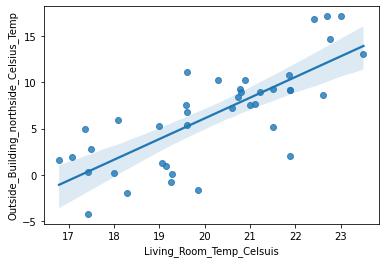

In [55]:
#12
simple_linear_reg_df = energy_df[['Living_Room_Temp_Celsuis','Outside_Building_northside_Celsius_Temp']].sample(40,random_state=2)
#regression plot
sns.regplot(x='Living_Room_Temp_Celsuis',y='Outside_Building_northside_Celsius_Temp',data=simple_linear_reg_df)

In [56]:
#normalise our data set to a common scale using min max scaler
scaler=MinMaxScaler()
normalised_df=pd.DataFrame(scaler.fit_transform(simple_linear_reg_df),columns=simple_linear_reg_df.columns)
normalised_df

,Living_Room_Temp_Celsuis,Outside_Building_northside_Celsius_Temp
0,0.094883,0.000000
1,0.889717,0.885677
2,0.661699,0.616012
3,0.642325,0.558149
4,0.755092,0.703665
5,0.084451,0.432285
6,0.329359,0.446322
7,0.880775,1.000000
8,0.417784,0.551365
9,0.760060,0.628334


In [88]:
features_df=np.array(normalised_df.Living_Room_Temp_Celsuis).reshape(-1,1)
target_df=normalised_df['Outside_Building_northside_Celsius_Temp']

In [89]:
#now we split our dataset into the training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(features_df,target_df,test_size=0.3,random_state=1)
linear_model=LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train,y_train)
#obtain predictions
predicted_values=linear_model.predict(x_test)
r2_score=metrics.r2_score(y_test,predicted_values)
round(r2_score,2)

0.65

Question 13
Answer: 0.05

In [94]:
#13
#normalise our data set to a common scale using min max scaler
scaler=MinMaxScaler()
normalised_df=pd.DataFrame(scaler.fit_transform(energy_df),columns=energy_df.columns)
features_df=normalised_df.drop(columns=['Appliances'])
target_df=normalised_df['Appliances']
#now we split our dataset into the training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(features_df,target_df,test_size=0.3,random_state=42)
mlr_model=LinearRegression()
#fit the model to the training dataset
mlr_model.fit(x_train,y_train)
#obtain predictions
mlr_predicted_values=mlr_model.predict(x_test)
mae=metrics.mean_absolute_error(y_test,mlr_predicted_values)
round(mae,2)

0.05

Q14 Ans: 45.35

In [91]:
#14
rss=np.sum(np.square(y_test - mlr_predicted_values))
round(rss,2)

45.35

Q15 Ans: 0.088

In [92]:
#15
rmse=np.sqrt(metrics.mean_squared_error(y_test,mlr_predicted_values))
round(rmse,3)

0.088

Q16 Ans: 0.15

In [93]:
#16
mlr_score=metrics.r2_score(y_test,mlr_predicted_values)
round(mlr_score,2)

0.15

Q17 Ans: RH_2,RH_1

In [86]:
#17
#get weights
def get_weights_df(model,feat,col_name):
  weights=pd.Series(model.coef_,feat.columns).sort_values()
  weights_df=pd.DataFrame(weights).reset_index()
  weights_df.columns=['Features',col_name]
  weights_df[col_name].round(3)
  return weights_df

In [95]:
#create weight
linear_model_weights_df=get_weights_df(mlr_model,x_train,'Linear_model_weight')
linear_model_weights_df

,Features,Linear_model_weight
0,Living_Room_Humidity(%),-0.456698
1,T_out,-0.321860
2,Living_Room_Temp_Celsuis,-0.236178
3,Parent_Room_Celsuis_Temp,-0.189941
4,Teenager_Room2_Humidity(%),-0.157595
5,RH_out,-0.077671
6,Ironing_Room_Humidity(%),-0.044614
7,Parent_Room_Humidity(%),-0.039800
8,Bathroom_Celsuis_Temp,-0.015657
9,Kitchen_Temp_Celsuis,-0.003281


Q18 Ans: No

In [98]:
#18
ridge_reg= Ridge(alpha=0.4)
ridge_reg.fit(x_train,y_train)
ridge_predictions=ridge_reg.predict(x_test)
rmse1=np.sqrt(metrics.mean_squared_error(y_test,ridge_predictions))
round(rmse1,3)

0.088

Q19 Ans: 4

In [97]:
#19
lasso_reg= Lasso(alpha=0.001)
lasso_reg.fit(x_train,y_train)
lasso_predictions=ridge_reg.predict(x_test)
lasso_weights_df=get_weights_df(lasso_reg,x_train,'Lasso_weight')
lasso_weights_df

,Features,Lasso_weight
0,RH_out,-0.049557
1,Teenager_Room2_Humidity(%),-0.000110
2,Kitchen_Temp_Celsuis,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,Parent_Room_Humidity(%),-0.000000
8,Parent_Room_Celsuis_Temp,-0.000000
9,Teenager_Room2_Celsuis_Temp,0.000000


Q20 Ans: 0.094

In [75]:
#20
rmse2=np.sqrt(metrics.mean_squared_error(y_test,lasso_predictions))
round(rmse2,3)

0.094